# Importing Libraries


In [92]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')


# Importing Dataset


In [93]:
df = pd.read_csv('emails_phishing.csv')
df.head()


,email,label
0,Subject: re : rankings\nthank you .,ham
1,"Subject: re : visit to enron\nvince ,\ndec . 2...",ham
2,Subject: research group move to the 19 th floo...,ham
3,Subject: christmas baskets\nthe christmas bask...,ham
4,"Subject: japan candidate\nvince ,\ni spoke wit...",ham


# Data Preprocessing


In [94]:
df.shape


(36251, 2)

In [95]:
df.drop_duplicates(inplace=True)


In [96]:
df.isnull().sum()


email    2
label    0
dtype: int64

In [97]:
# drop null values
df.dropna(inplace=True)


In [98]:
X = df['email']
y = df['label']


# Visualizations


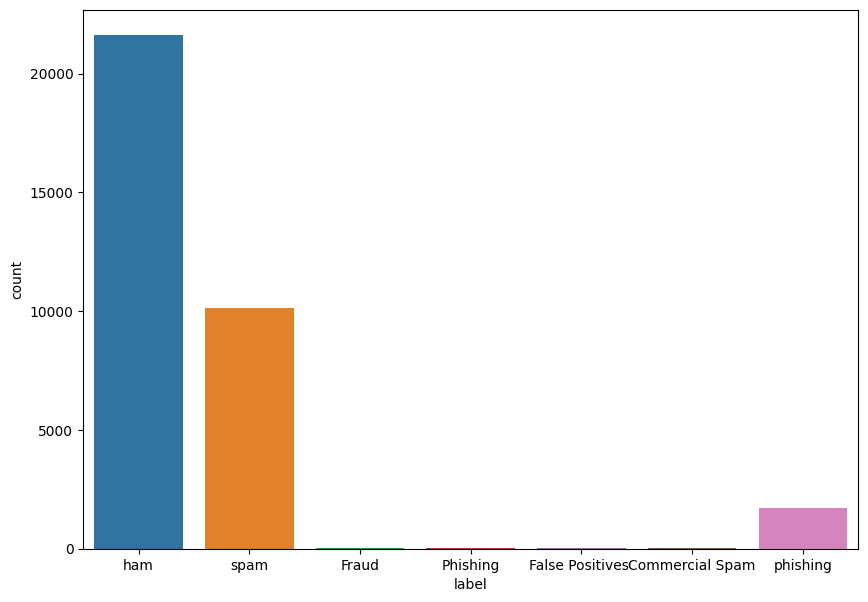

In [99]:
# plot the distribution of the labels
sns.countplot(x='label', data=df)

# increase the size of the plot
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 10

# decrese the x axis label
plt.xticks(size=10)

plt.show()


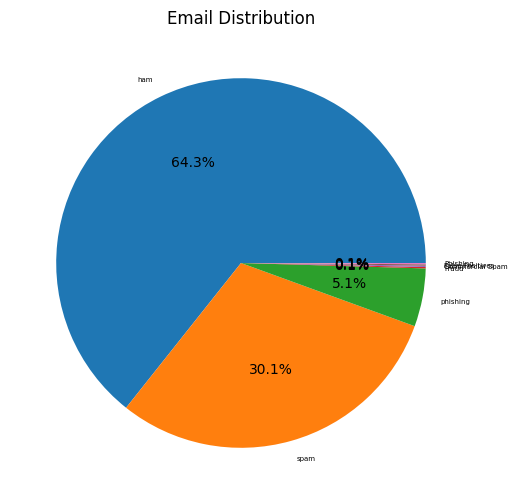

In [100]:
email_counts = df['label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(email_counts, labels=email_counts.index, autopct='%1.1f%%')
plt.title("Email Distribution")
plt.show()


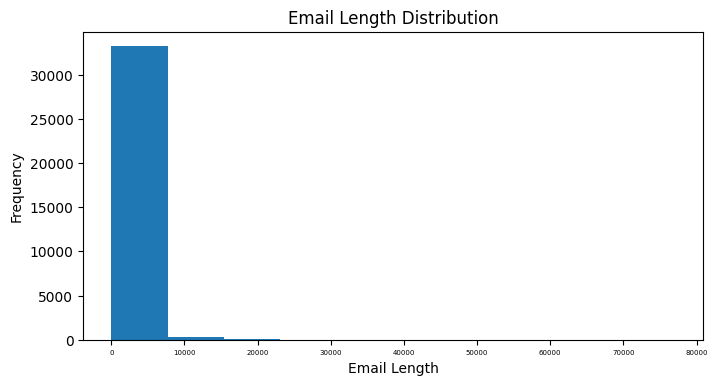

In [101]:
email_lengths = df['email'].apply(len)
plt.figure(figsize=(8, 4))
plt.hist(email_lengths, bins=10)
plt.xlabel("Email Length")
plt.ylabel("Frequency")
plt.title("Email Length Distribution")
plt.show()


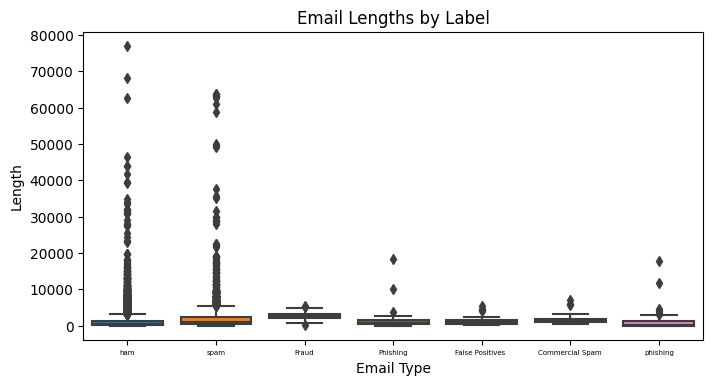

In [102]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='label', y=email_lengths)
plt.xlabel("Email Type")
plt.ylabel("Length")
plt.title("Email Lengths by Label")
plt.show()


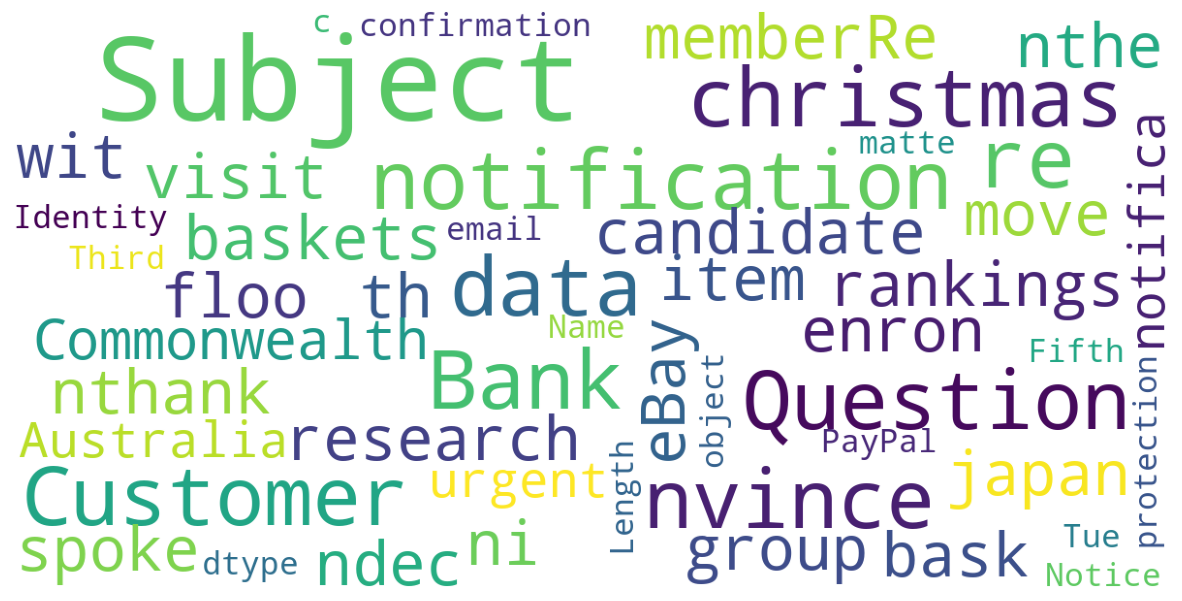

In [103]:
# use wordcloud to visualize the most common words in the emails
def show_wordcloud(data, title=None):
    wordcloud = WordCloud(background_color='white', max_words=200,
                          max_font_size=40, scale=3, random_state=42).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(df['email'])


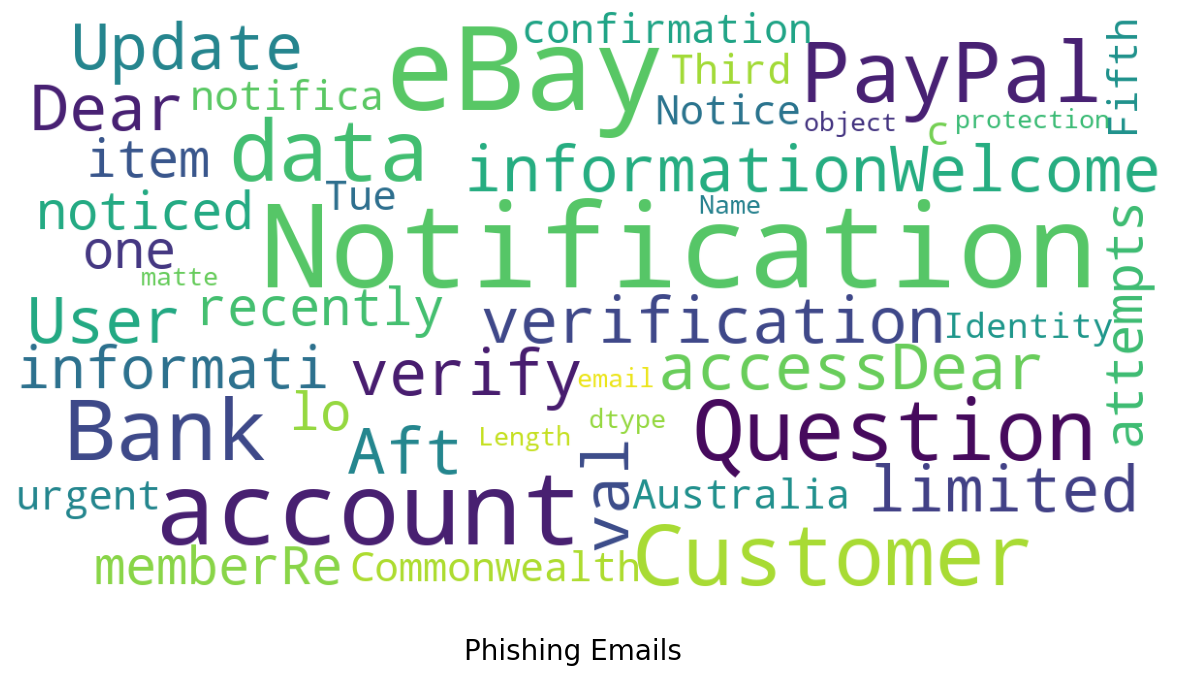

In [104]:
# use word cloud to visualize the most common words in the phishing emails
show_wordcloud(df[df['label'] == 'phishing']['email'], title='Phishing Emails')
 

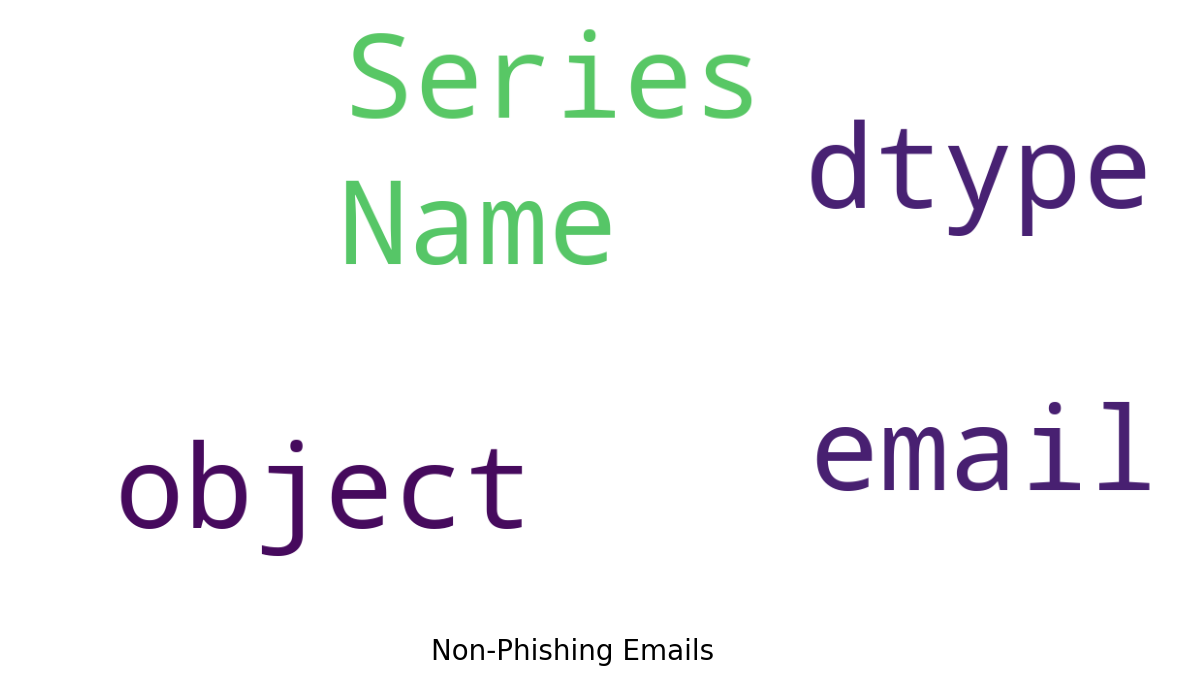

In [105]:
# use word cloud to visualize the most common words in the non-phishing emails
show_wordcloud(df[df['label'] == 'fraud']['email'],
               title='Non-Phishing Emails')


# Splitting Dataset into Test and Train


In [106]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [107]:
# vectorize the features
cv = CountVectorizer()
X_train_vect = cv.fit_transform(X_train)
X_test_vect = cv.transform(X_test)


# Training the Models


In [108]:
# train the models
model = {
    'MultinomialNB': MultinomialNB(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression()
}

trained_models = {}
for algo, classifier in model.items():
    classifier.fit(X_train_vect, y_train)
    trained_models[algo] = classifier
    print(f'{algo} trained')

     

MultinomialNB trained
SVC trained
RandomForestClassifier trained
GradientBoostingClassifier trained
LogisticRegression trained


# Model Evaluation


In [109]:
# # Evaluate the models
for algo, classifier in trained_models.items():
    X_test_vect = cv.transform(X_test)
    y_pred = classifier.predict(X_test_vect)
    print(f'{algo} accuracy: {accuracy_score(y_test, y_pred)*100}')
    print(f'{algo} precisixon: {precision_score(y_test, y_pred, average="weighted")*100}')
    print(f'{algo} recall: {recall_score(y_test, y_pred, average="weighted")*100}')
    print(f'{algo} f1: {f1_score(y_test, y_pred, average="weighted")*100}')


MultinomialNB accuracy: 96.03571428571429
MultinomialNB precisixon: 96.33556372879544
MultinomialNB recall: 96.03571428571429
MultinomialNB f1: 96.17827302417875
SVC accuracy: 91.03571428571429
SVC precisixon: 90.96048526062643
SVC recall: 91.03571428571429
SVC f1: 90.18432880008666
RandomForestClassifier accuracy: 97.89285714285715
RandomForestClassifier precisixon: 97.39911832835436
RandomForestClassifier recall: 97.89285714285715
RandomForestClassifier f1: 97.63206952436606
GradientBoostingClassifier accuracy: 94.79761904761905
GradientBoostingClassifier precisixon: 94.76070667063797
GradientBoostingClassifier recall: 94.79761904761905
GradientBoostingClassifier f1: 94.63465817962458
LogisticRegression accuracy: 98.45238095238096
LogisticRegression precisixon: 98.39021726608638
LogisticRegression recall: 98.45238095238096
LogisticRegression f1: 98.32662079095648


In [110]:
def check_email(email, model_name):
    model = trained_models[model_name]
    email_vect = cv.transform([email])
    prediction = model.predict(email_vect)
    print(f'Email: {email}')
    print(f'Prediction: {prediction[0]}')


# Hardcode


In [111]:


check_email('Hi, I am a software engineer', 'MultinomialNB')
check_email('Hi, I am a software engineer', 'SVC')
check_email('Hi, I am a software engineer', 'RandomForestClassifier')
check_email('Hi, I am a software engineer', 'GradientBoostingClassifier')
check_email('Hi, I am a software engineer', 'LogisticRegression')


Email: Hi, I am a software engineer
Prediction: spam
Email: Hi, I am a software engineer
Prediction: ham
Email: Hi, I am a software engineer
Prediction: ham
Email: Hi, I am a software engineer
Prediction: ham
Email: Hi, I am a software engineer
Prediction: ham


In [112]:
# # write a phishing email
check_email(" IMPORTANT: Notification of limited accounts[]", 'MultinomialNB')
check_email(" IMPORTANT: Notification of limited accounts[]", 'SVC')
check_email(" IMPORTANT: Notification of limited accounts[]",
            'RandomForestClassifier')
check_email(" IMPORTANT: Notification of limited accounts[]",
            'GradientBoostingClassifier')
check_email(" IMPORTANT: Notification of limited accounts[]",
            'LogisticRegression')


Email:  IMPORTANT: Notification of limited accounts[]
Prediction: phishing
Email:  IMPORTANT: Notification of limited accounts[]
Prediction: ham
Email:  IMPORTANT: Notification of limited accounts[]
Prediction: phishing
Email:  IMPORTANT: Notification of limited accounts[]
Prediction: ham
Email:  IMPORTANT: Notification of limited accounts[]
Prediction: phishing


# Generic


In [113]:
print("Select a model to use: ")
print("1. MultinomialNB")
print("2. SVC")
print("3. RandomForestClassifier")
print("4. GradientBoostingClassifier")
print("5. LogisticRegression")
print("6. Exit")

email = input("Enter an email: ")
model = input("Enter a model name: ")

check_email(email, model)
     

Select a model to use: 
1. MultinomialNB
2. SVC
3. RandomForestClassifier
4. GradientBoostingClassifier
5. LogisticRegression
6. Exit
Email: subject hello yoo hows you
Prediction: spam
